In [10]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [21]:
train_data = np.array(pd.read_csv('linear_data_train.csv'))
test_data = np.array(pd.read_csv('linear_data_test.csv'))

X_train = train_data[0:500, 0:2]
Y_train = train_data[0:500, 2]
X_test = test_data[:, 0:2]
Y_test = test_data[:, 2]


In [28]:
def fit(X_train,Y_train):
    lr = 0.01
    epochs = 8
    N = X_train.shape[0]

    m = np.random.rand(2, 1)
    b = np.random.rand(1, 1)

    x_0_range=np.arange(X_train[:,0].min(),X_train[:,0].max(),0.1)
    x_1_range=np.arange(X_train[:,1].min(),X_train[:,1].max(),0.1)

    Error = []
    for i in range(epochs):
        errors = []

        for n in range(N):

            y_pred = np.matmul(X_train[n:n+1], m) + b
            e = np.subtract(Y_train[n], y_pred)

            Y_pred = np.matmul(X_train, m) + b
            error = np.mean(np.abs(Y_train - Y_pred))
#             print('error: ', error)
            errors.append(error)

            #update
            m = m + lr*X_train[n:n+1, :].T * e
            b = b + lr * e

            # plot data
#             ax = plt.subplot(1, 2, 1, projection='3d')

            # ax.clear()
#             x_0, x_1 = np.meshgrid(x_0_range, x_1_range)
#             z = x_0 * m[0] + x_1 * m[1] + b
#             ax.plot_surface(x_0, x_1, z, rstride=1, cstride=1, alpha=0.4)
#             ax.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], Y_train[Y_train == 1], c='r', marker='o')
#             ax.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], Y_train[Y_train == -1], c='g', marker='o')
#             ax.set_xlabel('X0')
#             ax.set_ylabel('X1')
#             ax.set_zlabel('Y')

            
#         # Plot Error
        print(errors)
        Error.append(np.mean(errors))
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title('Loss')
        x = np.arange(0, len(Error))
        ax2.plot(x, Error, marker='o')
        plt.pause(0.01)
        # ax2.show()
    return m,b

def predict(X_test):
    y_pred=np.matmul(X_test,m)+b
    return y_pred

def evaluate(X,Y):
    y_pred = np.matmul(X, m) + b
    y_predic = np.zeros(len(y_pred))
    for i ,test in enumerate(X):
        y_predic[i]=predict(test)
    y_predic[np.where(y_predic<0)] =  -1
    y_predic[np.where(y_predic>0)] = 1
    accuracy = (y_predic == Y).sum() / len(Y)
    loss = np.mean(np.abs(np.subtract(Y, y_pred)))
    return loss, accuracy


[-1.2708990899649375, 0.37302864153218307, 0.4773768049379127, -1.2534693243255282, 0.4346842328007433, 0.4787128075315519, 0.473210244638674, 0.4337448426722278, 0.40585382695928063, -1.2598133400100129, 0.3809296137239704, 0.3728099389489484, 0.4190297324565675, 0.4888233672272606, -1.3082571794061781, 0.4857787338423112, 0.48003579513671624, 0.4051104038590796, 0.36886262866682906, -1.3445477690258238, 0.37761887694001994, -1.261663817666704, 0.42311134383734883, -1.420649161996375, 0.4780866658212304, 0.4101844339748426, 0.4039081855511919, -1.3393870723483638, 0.4493735431523116, 0.47154550050371236, 0.43209331506636817, 0.3265240222170964, -1.2945714632356937, 0.4640425626810133, 0.37139417729875024, 0.3590475519309173, -1.3065938061635756, -1.3406530146325888, -1.3413570074818204, -1.2119358121602068, -1.2984341977861202, 0.4608513841088996, 0.4026557544970564, -1.319148811281969, -1.3326170120930416, 0.5772985236318693, 0.44260861183602884, 0.41345607333668866, -1.1717071173113

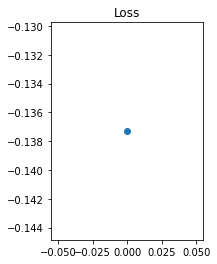

[-0.7103796695250815, 0.3537092180829918, 0.6312101590005912, -0.6757500083021126, 0.5102240644712752, 0.6259278291375762, 0.6200876091862443, 0.5279450508862242, 0.47968435290655353, -0.6842596496173506, 0.3903790954499391, 0.3784406839979635, 0.5070140516895991, 0.6894202536972842, -0.8047798091444403, 0.6676421841351394, 0.6604318379702745, 0.475063630634045, 0.3973610289419094, -0.8937281223351836, 0.3977652517084407, -0.7161296768034178, 0.485366974401115, -1.1119254282610522, 0.600167466115763, 0.43961917591511124, 0.4424199891011975, -0.9248228325203356, 0.5327841315831585, 0.5912289076285686, 0.5048306181124544, 0.2596740721921281, -0.821526586426633, 0.5680939180711726, 0.35981243027876486, 0.3367146136198177, -0.8526485563717991, -0.9592766387176652, -0.9837445154285138, -0.6987699115032151, -0.9216319780982977, 0.4599398799289367, 0.32503690463374646, -0.9896663945160344, -1.0459626573942709, 0.695879605125506, 0.39002513756383017, 0.32296299585524, -0.6491463060012774, -0.7

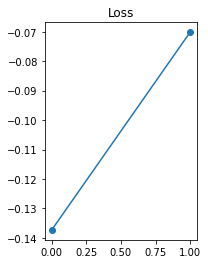

[-0.47053081740387537, 0.11382378782409242, 0.5395544414650653, -0.4113530224219535, 0.3646618162088291, 0.5386828448414421, 0.5348582436294272, 0.40100087495426995, 0.34895145222958734, -0.4072428037027287, 0.20605820143643538, 0.19269242070735115, 0.3943865629130441, 0.6719001367010156, -0.5761235789414988, 0.6448386213946236, 0.6383442050785136, 0.3599187820387487, 0.2535780343292584, -0.6966480081929362, 0.25276692097314557, -0.4440826778868674, 0.37538048248525235, -1.0162479636608488, 0.5439152579110738, 0.31060285401017473, 0.3286504205466423, -0.7416899259260616, 0.45843082913904565, 0.5444411966760561, 0.4240247380256993, 0.07332476528024856, -0.5892968989298217, 0.5162329236962687, 0.2240585055679959, 0.1930904732997124, -0.626219914216775, -0.7869867412343048, -0.8266738858975861, -0.42228534867746936, -0.7443163342295777, 0.3474396879641808, 0.15418997754880848, -0.8481066636904344, -0.934837450011562, 0.6771999484079624, 0.24684286905069508, 0.15016296653627004, -0.3519815

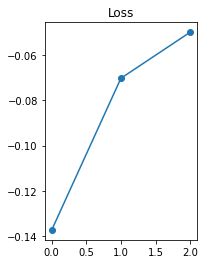

[-0.300755820521144, -0.056603478941688046, 0.4742597596110334, -0.22392705103199795, 0.26157426957055563, 0.47654969035386574, 0.4740532438999805, 0.31042481176917835, 0.2566018247127049, -0.2107957940772558, 0.07503107308545909, 0.060444848201140156, 0.31429324346497145, 0.6593856669478122, -0.41404755706284935, 0.6291337129344305, 0.6230808976000095, 0.2778762204082219, 0.15139053161790716, -0.5569091716894511, 0.1497549885159899, -0.25164193969612614, 0.2968202137646605, -0.9479893941379967, 0.503656205196497, 0.21847490338149123, 0.24801436271218602, -0.6118589911020103, 0.4057347053427738, 0.51088798108947, 0.3664068502205149, -0.0590065130565518, -0.42533725825009716, 0.478887418569393, 0.1277544431170976, 0.09092918788230864, -0.46599246407278727, -0.6650708678681946, -0.7152830131746819, -0.2265031517408701, -0.6181161494943712, 0.26807848239855514, 0.033240741359733095, -0.7478476959060569, -0.8559809475783662, 0.6636112365932749, 0.14577008459387297, 0.02765275261600908, -0.

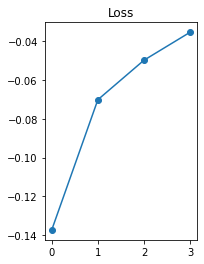

[-0.18049134526316157, -0.1775572504402283, 0.42786056986016185, -0.09092548356967367, 0.1887818091259943, 0.43241598803609027, 0.4307633704020315, 0.24584503409114733, 0.1916200141314346, -0.07134172769940306, -0.018015465364638716, -0.0336659752387809, 0.2574433480322307, 0.6505773717120218, -0.2990455349924551, 0.6185825600493746, 0.6127785779639383, 0.21947843321193528, 0.07885975921780619, -0.4577029181186847, 0.07667048571169843, -0.11550191421046763, 0.24071536925522086, -0.8990719565253096, 0.4748907446470694, 0.15267432848457108, 0.19100042516078974, -0.5197074242796058, 0.3685181524826857, 0.48686227908162394, 0.32537046305234907, -0.15290048086653862, -0.3096402737691548, 0.45198179745522427, 0.05954139191441965, 0.01830039232079539, -0.35258799652084305, -0.5787592086687748, -0.6361837528444777, -0.08783492974516971, -0.5280906948815558, 0.21229607704250664, -0.05223430506601057, -0.6767733908864901, -0.7999151962019329, 0.6537475555565191, 0.07462746158064215, -0.059103118

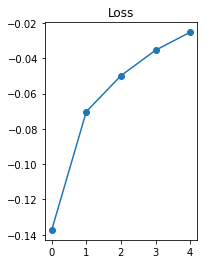

[-0.09531933608345566, -0.2634325660011956, 0.3948621543002395, 0.003488496225083626, 0.13745030475606002, 0.4010465918630679, 0.3998995789800417, 0.1997131961869878, 0.14601366309383845, 0.02770093156100928, -0.08412950153464127, -0.10072318543511938, 0.2170742918677171, 0.6443931769443949, -0.2174190096428128, 0.6116545337993029, 0.6059660915772529, 0.17785467215921869, 0.027357070691499397, -0.38723709640286097, 0.024804351003817837, -0.019257810363741856, 0.20055061441484945, -0.8638927039387774, 0.4542848688754253, 0.10556266652853807, 0.15072420369772344, -0.4542720789928374, 0.34226765897210054, 0.46960315981418277, 0.29609857592267974, -0.2195422655224566, -0.2281279425496071, 0.4324995377188583, 0.011238789082186784, -0.03338232807613428, -0.27236610004425577, -0.5176807652828589, -0.5799824662103867, 0.010352496332916017, -0.46373828205580514, 0.17320350766826942, -0.11257601754658664, -0.6263876090032043, -0.7600139776695487, 0.6465366551057594, 0.02467542693760194, -0.12051

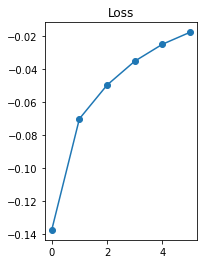

[-0.0350194891994734, -0.3244344236013119, 0.37136889416908936, 0.07054155258559303, 0.10131797685663169, 0.37872996466473374, 0.37785363670017236, 0.16667719853206187, 0.11411826903452704, 0.09808693835004023, -0.13114346654419484, -0.14858460163431308, 0.18839182321035586, 0.6400660299222516, -0.15945719158726557, 0.6072660353875994, 0.6016018261797125, 0.14813356662705668, -0.00923464305406485, -0.33715218403580227, -0.012017440837283733, 0.048718555677167874, 0.1717060557454504, -0.8384784844216766, 0.4394743960336138, 0.07172365020989835, 0.12230572874815726, -0.4077811723378111, 0.3237839219480172, 0.45715265840537045, 0.27517584466226874, -0.2668611796146896, -0.170822179496407, 0.41830097229479146, -0.022952397116463796, -0.07020642710831337, -0.21565791685110802, -0.47448413121989774, -0.5400198981311795, 0.07984967425476786, -0.4176130023466691, 0.14591849801445034, -0.1551142384369375, -0.5906676771073536, -0.7315797260274126, 0.6412177009463071, -0.010280068678137244, -0.16

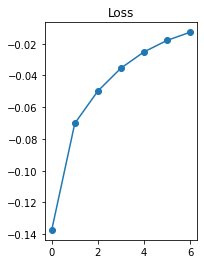

[0.0076529612918563306, -0.3677973266510386, 0.3546189633319792, 0.11819242434006161, 0.07594670072147247, 0.3628348354825306, 0.36206724993827866, 0.14294207063057374, 0.09191962120157915, 0.14814953462861746, -0.16461005327348088, -0.18282143003655071, 0.16799719431893423, 0.6370523443610014, -0.1182759945118933, 0.6046504293713804, 0.5989487433969307, 0.1268612701547296, -0.035251927898522606, -0.30152188318441064, -0.038171702965452914, 0.09666947335616838, 0.15090565923782528, -0.820011428096159, 0.4287828134358673, 0.047316508763375564, 0.10228606072718738, -0.37472512521856693, 0.310799373409274, 0.44812218601191933, 0.26018069587777304, -0.30047839390062236, -0.13065107686396238, 0.4078682102462139, -0.04714285218242309, -0.09648773084871376, -0.17560982948168824, -0.44395831834562804, -0.5115750697405672, 0.12901440366939787, -0.3844351227512227, 0.12698132293494369, -0.1850442767365783, -0.5653442244590792, -0.7112819918787308, 0.6372507531403737, -0.034628562980409505, -0.19

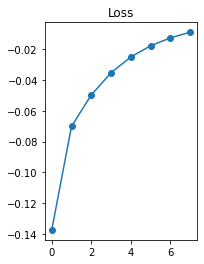

In [29]:
m,b = fit(X_train,Y_train)

In [6]:
print(errors)

NameError: name 'errors' is not defined

In [15]:
y_pred=predict(X_test)
loss, accuracy = evaluate(X_test, Y_test)
print('error',loss, 'accuracy',accuracy)

error 1.0761142861402402 accuracy 1.0


In [17]:
loss, accuracy = evaluate(X_train, Y_train)
print('error',loss, 'accuracy',accuracy)


error 1.0765705988889636 accuracy 0.999
